Question 2) Find all the mentions of world countries in the whole corpus, 
using the pycountry utility (HINT: remember that there will be different surface forms 
for the same country in the text, e.g., Switzerland, switzerland, CH, etc.) 
Perform sentiment analysis on every email message using the demo methods 
in the nltk.sentiment.util module. Aggregate the polarity information of all 
the emails by country, and plot a histogram (ordered and colored by polarity level) 
that summarizes the perception of the different countries. Repeat the aggregation and plotting steps using different demo methods from the sentiment analysis module.
Can you find substantial differences?

In [51]:
import pandas as pd
import pycountry
from nltk.sentiment import *
import numpy as np
import matplotlib.pyplot as plt
import codecs
import math
import re
import string



Pre Process the Data, Dropping Irrelevant Columns

In [118]:
emails = pd.read_csv("hillary-clinton-emails/Emails.csv")


In [119]:
# Drop columns that won't be used
emails = emails.drop(['DocNumber', 'MetadataPdfLink','DocNumber', 'ExtractedDocNumber', 'MetadataCaseNumber'], axis=1)
emails.head()

,Id,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,HRC_Email_296,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,HRC_Email_296,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [120]:
emails_cut = emails[['ExtractedBodyText']].copy()
emails_cut.head()

,ExtractedBodyText
0,NaN
1,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,Thx
3,NaN
4,"H <hrod17@clintonemail.com>\nFriday, March 11,..."


In [121]:
emails_cut = emails_cut.dropna()
emails_cut.head()


,ExtractedBodyText
1,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,Thx
4,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
5,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
7,"H <hrod17@clintonemail.corn>\nFriday, March 11..."


Now we must tokenize the data...

In [122]:
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer = RegexpTokenizer(r'\w+')

In [123]:
emails_tokenized = emails_cut.copy()
for index, row in emails_tokenized.iterrows():
    row['ExtractedBodyText'] = tokenizer.tokenize(row['ExtractedBodyText'])
emails_tokenized.columns = ['TokenizedText']
emails_tokenized.reset_index(drop=True, inplace=True)
emails_tokenized.head()

,TokenizedText
0,"[B6, Thursday, March, 3, 2011, 9, 45, PM, H, L..."
1,[Thx]
2,"[H, hrod17, clintonemail, com, Friday, March, ..."
3,"[Pis, print, H, hrod17, clintonernailcom, Wedn..."
4,"[H, hrod17, clintonemail, corn, Friday, March,..."


Figure out what words to remove...

In [124]:
#Make sure to Capitalize all words
#for email in emails_no_stop['TokenizedText']:
 #   size = len(email)
#  for i in range (0,size):
   #     wn = email[i].title()
    #    email[i] = wn
    

#emails_no_stop.head()



In [128]:
words_delete = ['IT', 'RE','LA','AND', 'AM', 'AT', 'IN', 'I', 'ME', 'DO', 
                'A', 'AN','BUT', 'IF', 'OR','AS','OF','BY', 'TO', 'UP','ON','ANY', 'NO', 'NOR', 'NOT','SO',
                'S', 'T','DON','D', 'LL', 'M', 'O','VE', 'Y','PM', 'TV','CD','PA','ET', 'BY', 'IE','MS', 'MP', 'CC', 
                'GA','VA', 'BI','CV', 'AL','VAT', 'VA','AI', 'MD', 'SM', 'FM', 'EST', 'BB', 'BRB', 'AQ', 'MA', 'MAR', 'JAM', 'BM', 
                'Lybia', 'LY', 'LBY', 'MC', 'MCO', 'MO', 'MAC', 'NC', 'PG', 'PNG', 'SUR', 'VI', 'lybia', 'ARM'] 
emails_final = emails_tokenized.copy()
emails_final['TokenizedText'] = emails_final['TokenizedText'].apply(lambda x: [item for item in x if item not in words_delete])
emails_final.head()

,TokenizedText
0,"[B6, Thursday, March, 3, 2011, 9, 45, H, Lates..."
1,[Thx]
2,"[H, hrod17, clintonemail, com, Friday, March, ..."
3,"[Pis, print, H, hrod17, clintonernailcom, Wedn..."
4,"[H, hrod17, clintonemail, corn, Friday, March,..."


Create list of countries

In [129]:
countries_cited = []
for emails in emails_final['TokenizedText']:
    for word in emails:
        try:
            country_name = pycountry.countries.get(alpha_2=word)
            countries_cited.append(country_name.name)
        except KeyError:
            try:
                country_name = pycountry.countries.get(alpha_3=word)
                countries_cited.append(country_name.name)
            except KeyError:
                try:
                    country = pycountry.countries.get(name=word)
                    countries_cited.append(country_name.name)
                except KeyError: pass


Organize List and Count Occurrence of Each Country

In [130]:
#List with Unique Entries of Countries Cited
final_countries = list(set(countries_cited))
size = len(final_countries)
final_countries

['Qatar',
 'New Zealand',
 'Greece',
 'Tunisia',
 'Indonesia',
 'Brazil',
 'China',
 'British Indian Ocean Territory',
 'Palestine, State of',
 'Japan',
 'Myanmar',
 'Hong Kong',
 'Georgia',
 'Kenya',
 'Argentina',
 'Switzerland',
 'Congo',
 'Sudan',
 'Comoros',
 'Puerto Rico',
 'Malaysia',
 'Colombia',
 'Australia',
 'Belgium',
 'Hungary',
 'Luxembourg',
 'Peru',
 'Turkmenistan',
 'Jamaica',
 'Svalbard and Jan Mayen',
 'Iceland',
 'Brunei Darussalam',
 'Somalia',
 'Finland',
 'Denmark',
 'Costa Rica',
 'Mauritius',
 'Guinea-Bissau',
 'Saudi Arabia',
 'Mongolia',
 'Sierra Leone',
 'Poland',
 'Armenia',
 'Nauru',
 'Thailand',
 'Lithuania',
 'Slovenia',
 'Iraq',
 'Liechtenstein',
 'Portugal',
 'Singapore',
 'Cuba',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Israel',
 'Azerbaijan',
 'Namibia',
 'Marshall Islands',
 'Serbia',
 'Canada',
 'Philippines',
 'Tuvalu',
 'Gambia',
 'Kiribati',
 'Samoa',
 'Germany',
 'United States',
 'Cayman Islands',
 'Trinidad and Tobago',
 'Seychelles',
 'Czechi

In [131]:
#Create New DataFrame for the Counts
Country_Sent = pd.DataFrame(index=range(0,size),columns=['Country', 'Count'])
Country_Sent['Country']=final_countries
Country_Sent.head()

,Country,Count
0,Qatar,NaN
1,New Zealand,NaN
2,Greece,NaN
3,Tunisia,NaN
4,Indonesia,NaN


In [132]:
count_list = []
for country in Country_Sent['Country']:
    count = countries_cited.count(country)
    count_list.append(count)
    
Country_Sent['Count']=count_list
Country_Sent.head()



,Country,Count
0,Qatar,1
1,New Zealand,31
2,Greece,1
3,Tunisia,10
4,Indonesia,9


In [163]:
#Take Out Countries with Less than 20 Citations
Country_Sent= Country_Sent[Country_Sent['Count'] > 14]
Country_Sent = Country_Sent.reset_index(drop=True)
Country_Sent.head()


,Country,Count,Alpha_2,Alpha_3
0,New Zealand,31,NZ,NZL
1,Georgia,47,GE,GEO
2,Puerto Rico,72,PR,PRI
3,Australia,42,AU,AUS
4,Hungary,17,HU,HUN


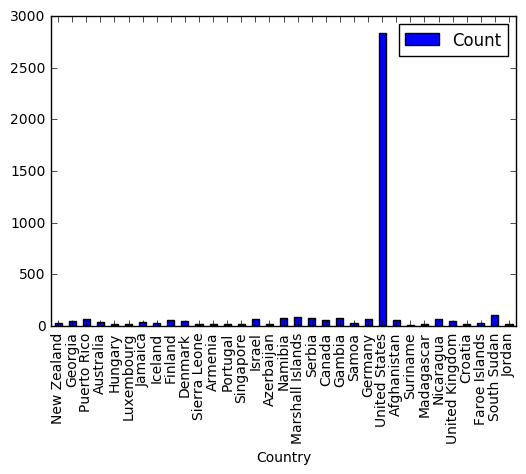

In [164]:
#plot to see frequencies
Country_Sent.plot.bar(x='Country', y='Count')
plt.show()

#We have repeatedly plotted this, identifying weird occurances (small countries with high counts), 
#and then elimitating them from the data set and repating the process

In [165]:
#create a list with all possible names of the countries above
countries_used_name = []
countries_used_alpha_2 =[]
countries_used_alpha_3 =[]

for country in Country_Sent['Country']:
    country_names = pycountry.countries.get(name=country)
    countries_used_name.append(country_names.name)
    countries_used_alpha_2.append(country_names.alpha_2)
    countries_used_alpha_3.append(country_names.alpha_3)

Country_Sent['Alpha_2']=countries_used_alpha_2
Country_Sent['Alpha_3']=countries_used_alpha_3

Country_Sent.head()

,Country,Count,Alpha_2,Alpha_3
0,New Zealand,31,NZ,NZL
1,Georgia,47,GE,GEO
2,Puerto Rico,72,PR,PRI
3,Australia,42,AU,AUS
4,Hungary,17,HU,HUN


Now we check sentiment on emails around these names

In [ ]:
for country in countries_used:
    country_names=[]
    try:
        country_name = pycountry.countries.get(alpha_2=country)
        country_names.append(country_name.alpha_2)    
    except KeyError:
            try:
                country_name = pycountry.countries.get(alpha_3=country)
                country_names.append(country_name.alpha_3)
            except KeyError:
                try:
                    country_name = pycountry.countries.get(name=country)
                    country_names.append(country_name.name)
                except KeyError:
                    country_names.append('NaN')

In [ ]:
sentiments = []
vader_analyzer = SentimentIntensityAnalyzer()

size = len(Country_Sent['Alpha_2'])
for i in range(1,size):
    country_score =[]
    for email in emails_no_stop['TokenizedText']:
        if Country_Sent['Alpha_2'][i] in email or Country_Sent['Alpha_3'][i] in email or Country_Sent['Country'][i] in email:
            str_email = ' '.join(email)
            sentiment = vader_analyzer.polarity_scores(str_email)
            score = sentiment['compound']
            country_score.append(score)
        else: pass
    if len(country_score)!=0:
        sentiment_score = sum(country_score) / float(len(country_score))
        sentiments.append(sentiment_score)
    else:
        sentiments.append(999)

                   
              
        

In [ ]:
#add sentiment list to data frame
Country_Sent['Sentiment'] = sentiments
#delete any row with sentiment value of 999
Country_Sent = Country_Sent[Country_Sent['Sentiment'] != 999]
#reorder dataframe in ascending order of sentiment
df.sort_values(['Sentiment'], ascending=True, inplace=True)
#reorder index
Country_Sent = Country_Sent.reset_index(drop=True)

Now we make a color gradient for the histogram

In [ ]:
#We must normalize the sentiment scores and create a gradient based on that (green, blue & red gradient)
#first we sort the ones that are below zero, than the ones above zero
Country_Sent['color_grad'] =[]
size = len(Country_Sent['Sentiment'])

for i in range(1,size):
    if Country_Sent['Sentiment'][i] < 0:
        high = 0
        low = np.min(sentiments)
        rg = high-low
        new_entry = (low-entry)/rg
        red = 1 - new_entry
        Country_Sent['color_grad'][i]=(red,0,new_entry)
    else:
        high = np.max(sentiments)
        low = 0
        rg = high-low
        new_entry = (entry-low)/rg
        green = 1 - new_entry
        Country_Sent['color_grad'][i]= (0,green,new_entry)

Country_Sent.head()


In [ ]:
#Now we create the bar plot based on this palette
import seaborn as sns
plot = sns.barplot(x='Country', y='Sentiment', data=Country_Sent, orient='vertical', palette=Country_Sent['color_grad'])
plt.ylabel('Country Sentiment');
plt.show()

In [ ]:
#Now we create a bar plot with an automatic gradient based on sentiment
size = len(Country_Sent['Sentiment'])
grad = sns.palplot(sns.diverging_palette(10, 145, n=size))plot = sns.barplot(x='Country', y='Sentiment', data=Country_Sent, orient='vertical', palette=grad)
plt.ylabel('Country Sentiment');
plt.show()